# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Scatter3D
from pyecharts.faker import Faker

# 2. Import Data & Preprocessing

## (1) Import Data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sample_submission.csv")

## (2) Null Check

결측치를 체크하는 가장 좋은 라이브러리는 missingno입니다. 본 대회에서는 결측치가 없어 missingno의 장점을 확인할 수 없었습니다.

In [3]:
data = train.drop(['id', 'target'], axis=1)
data.isna().sum().sum()

0

In [4]:
# msno.bar(data);

In [5]:
# msno.dendrogram(data);

In [6]:
#msno.heatmap(data);

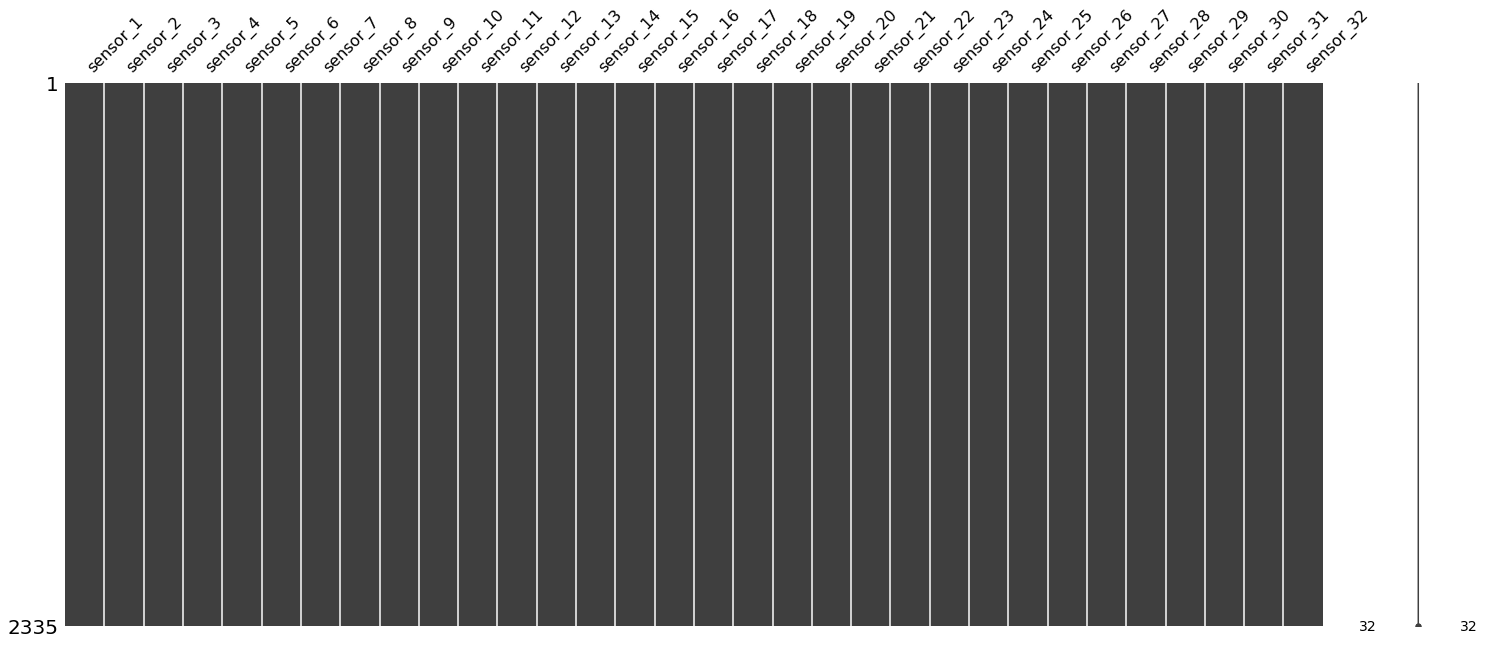

In [7]:
msno.matrix(data);

## (3) Analysis

센서의 최댓값이 127.16이고 센서의 최솟값이 -127.8인것으로 보아, 0~255까지의 흑백 사진이라고 추측하여 아래 3(1)-3(3) 과정을 진행하였습니다.<br>
"손에 부착된 센서의 데이터"라고 언급되었으므로, 관점을 달리하여 센서의 z축 값이라고도 추측하여 아래 3(4) 과정도 진행하였습니다.

In [8]:
data.max().max()

127.1610552

In [9]:
data.min().min()

-127.797649

# 3. Visualization

## (1) 8 x 4 Samples

손동작별로 10가지씩 샘플 데이터를 랜덤하게 추출하여 8x4 사이즈로 시각화하였습니다.

In [10]:
def imshow_8x4(data, target, number):
    
    df = data[data['target']==target] # target 손동작에 해당하는 데이터들만 뽑기
    ids = np.random.choice(df.id, number) # 랜덤으로 number개 추출
    
    fig, ax = plt.subplots(int(number/5), 5, figsize=(20, number*1.5))
    ax = ax.ravel()
    plt.suptitle(f'Target: {target}', size=30, weight='bold')
    for i in range(number):
        ax[i].set_title(f'ID: {ids[i]}', size=16)
        ax[i].imshow(np.array(df.loc[int(ids[i])-1])[1:-1].reshape(8, 4), cmap='gray', vmin=-255/2, vmax=255/2)
    return None

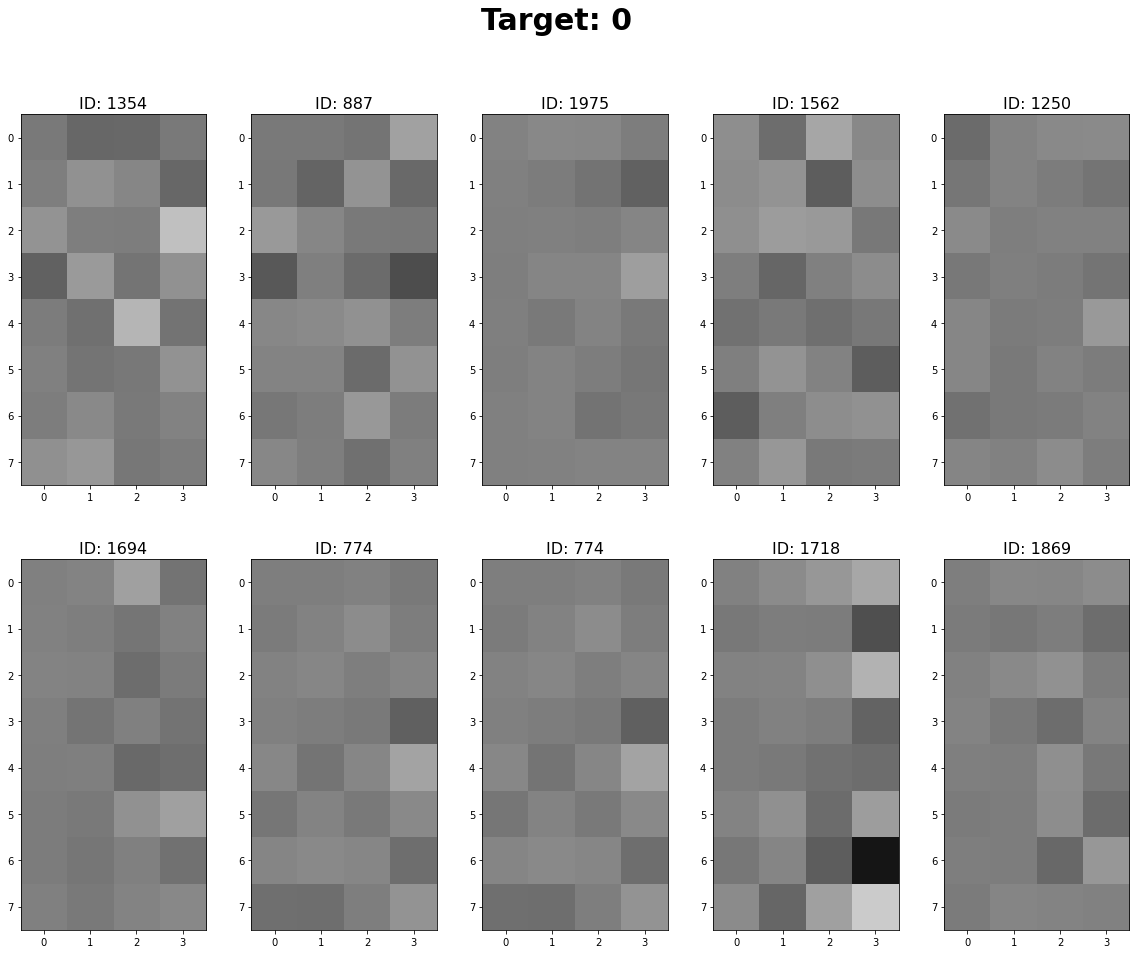

In [11]:
imshow_8x4(train, 0, 10)

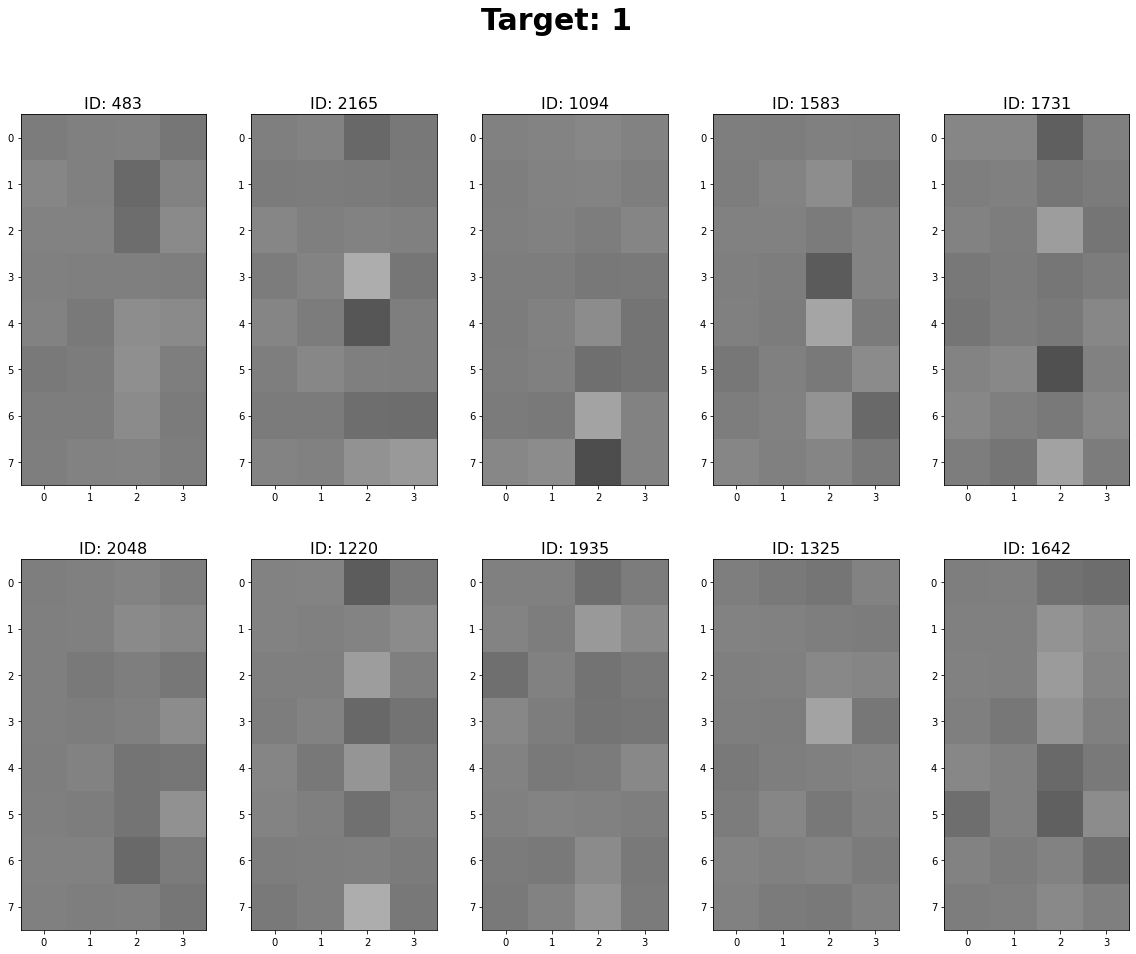

In [12]:
imshow_8x4(train, 1, 10)

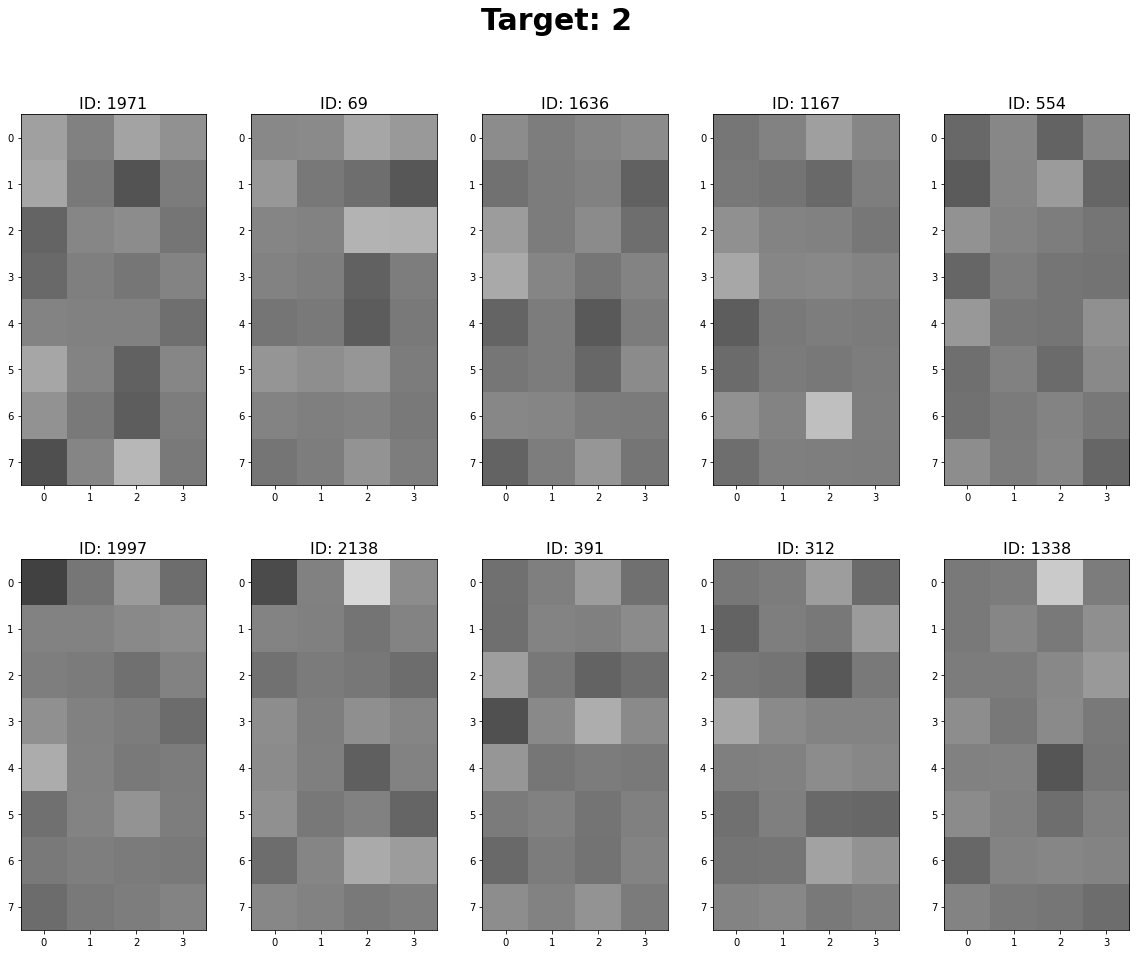

In [13]:
imshow_8x4(train, 2, 10)

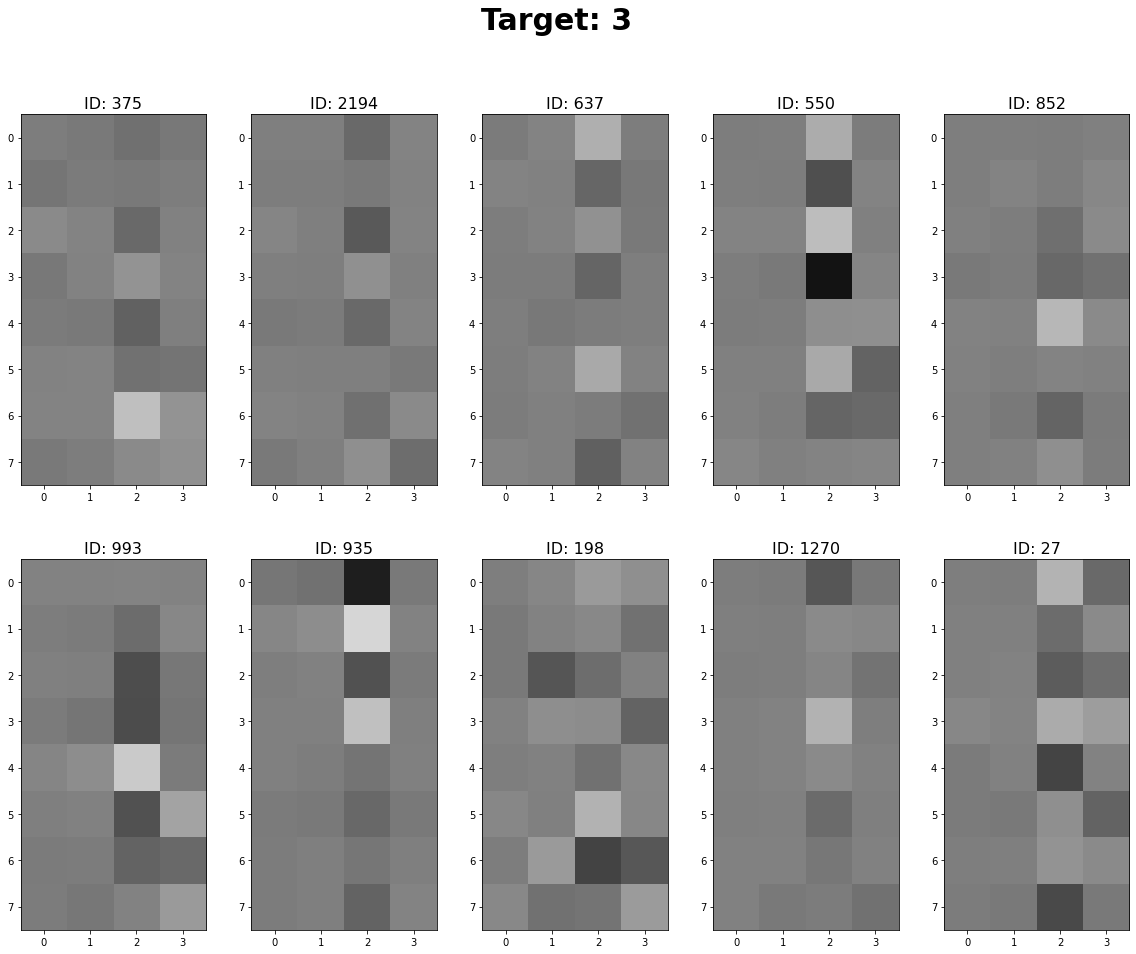

In [14]:
imshow_8x4(train, 3, 10)

## (2) 4 x 8 Samples

손동작별로 10가지씩 샘플 데이터를 랜덤하게 추출하여 4x8 사이즈로 시각화하였습니다.

In [15]:
def imshow_4_8(data, target, number):
    
    df = data[data['target']==target] # target 손동작에 해당하는 데이터들만 뽑기
    ids = np.random.choice(df.id, number) # 랜덤으로 number개 추출
    
    fig, ax = plt.subplots(int(number/3), 3, figsize=(20, number*1.5))
    ax = ax.ravel()
    plt.suptitle(f'Target: {target}', size=30, weight='bold')
    for i in range(number):
        ax[i].set_title(f'ID: {ids[i]}', size=16)
        ax[i].imshow(np.array(df.loc[int(ids[i])-1])[1:-1].reshape(4, 8), cmap='gray', vmin=-255/2, vmax=255/2)
    return None

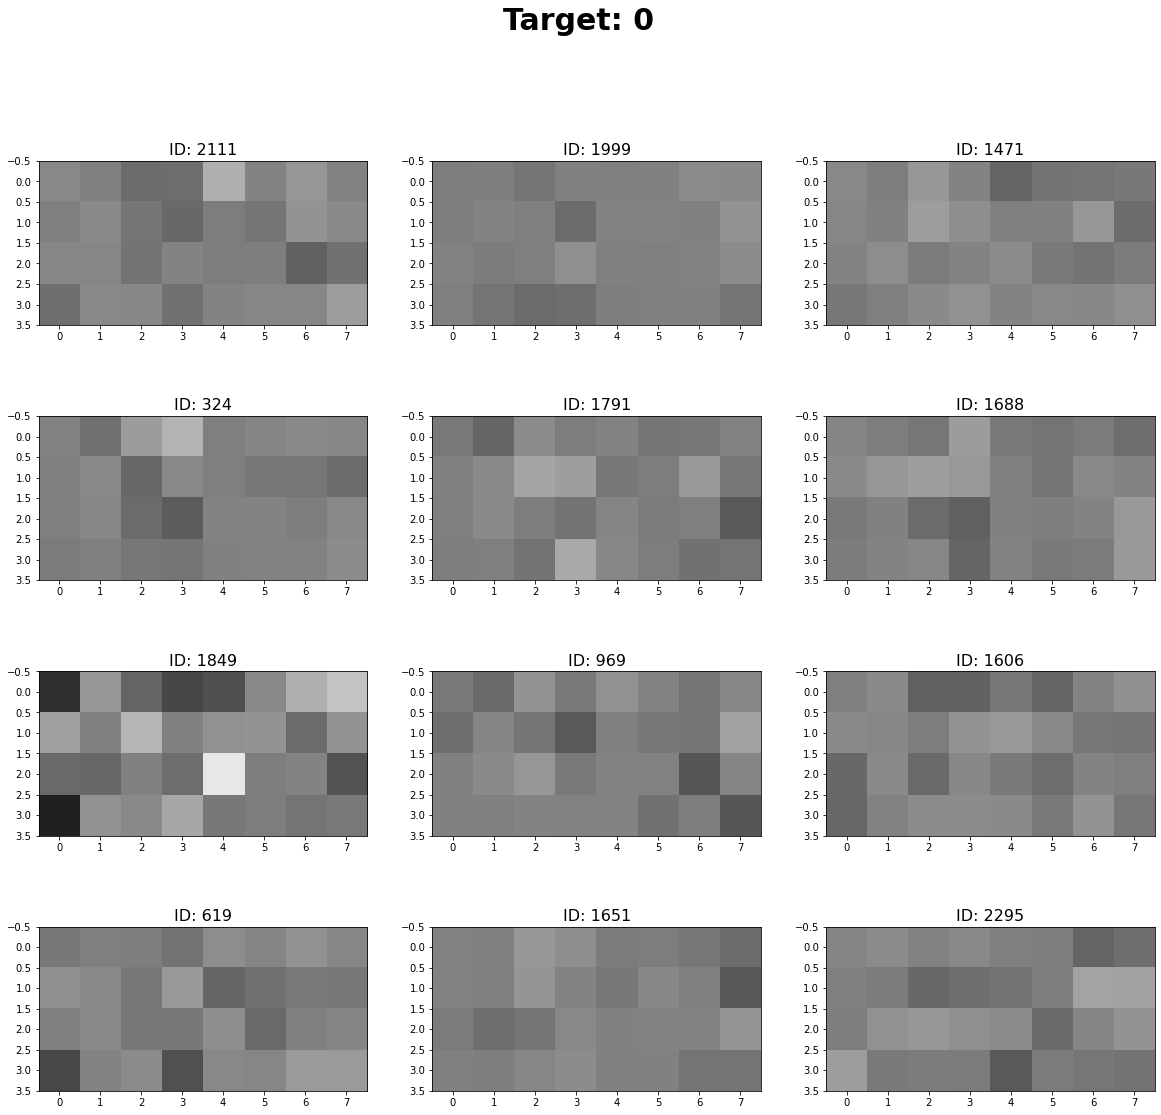

In [16]:
imshow_4_8(train, 0, 12)

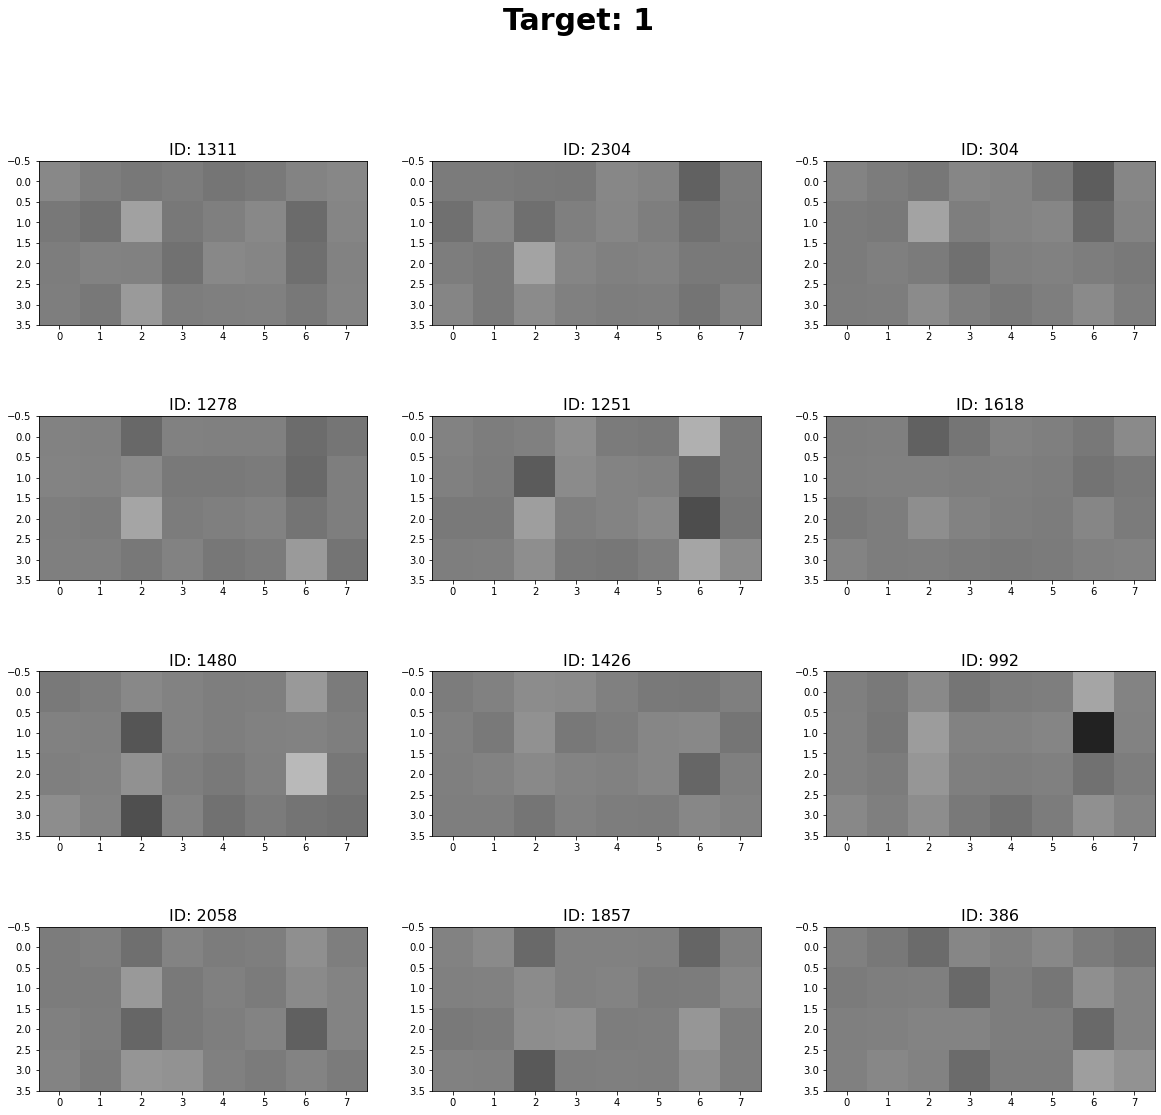

In [17]:
imshow_4_8(train, 1, 12)

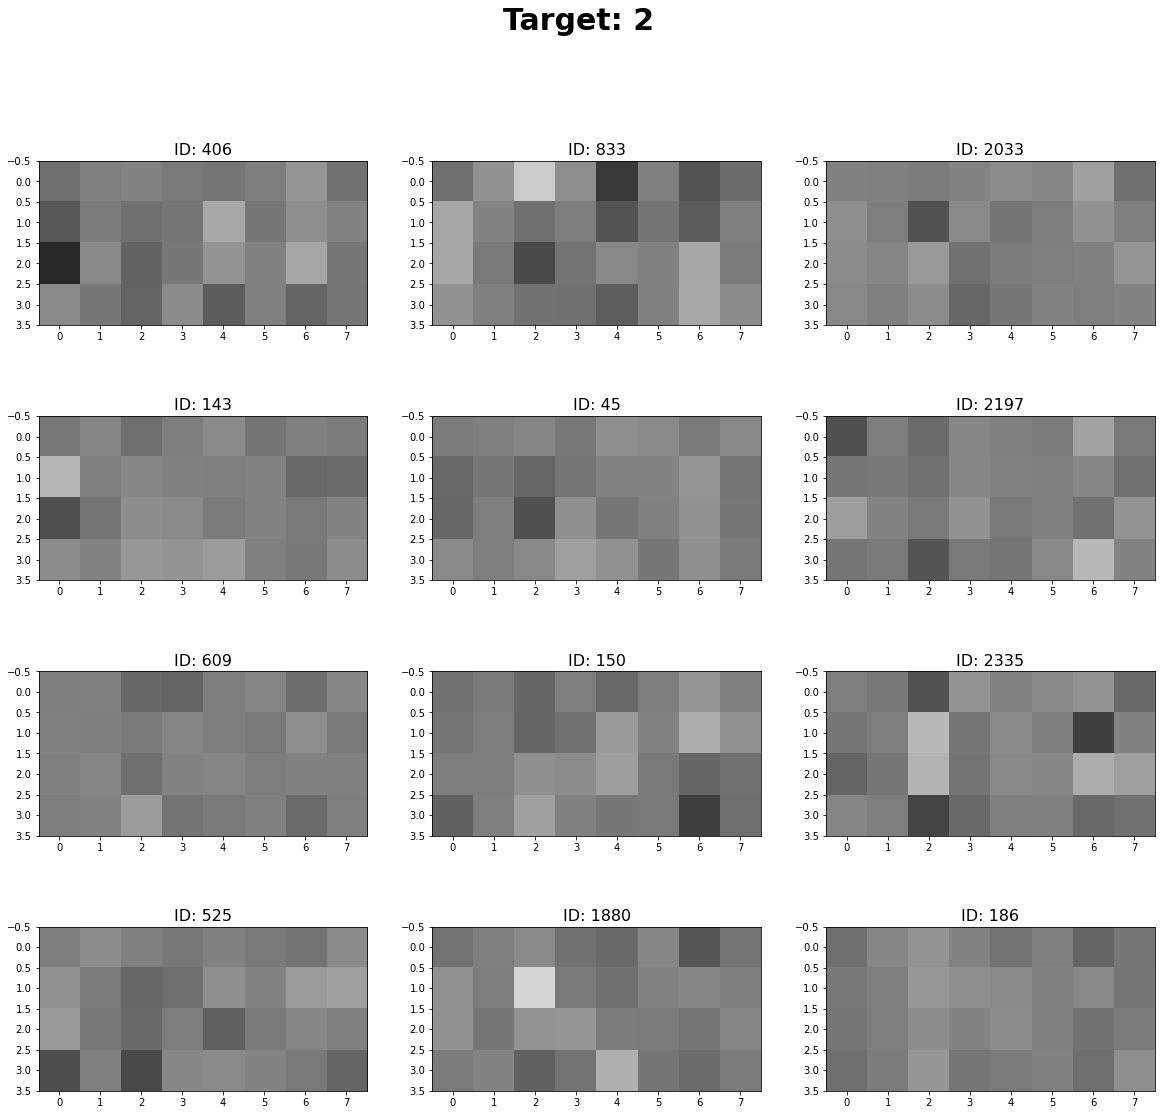

In [18]:
imshow_4_8(train, 2, 12)

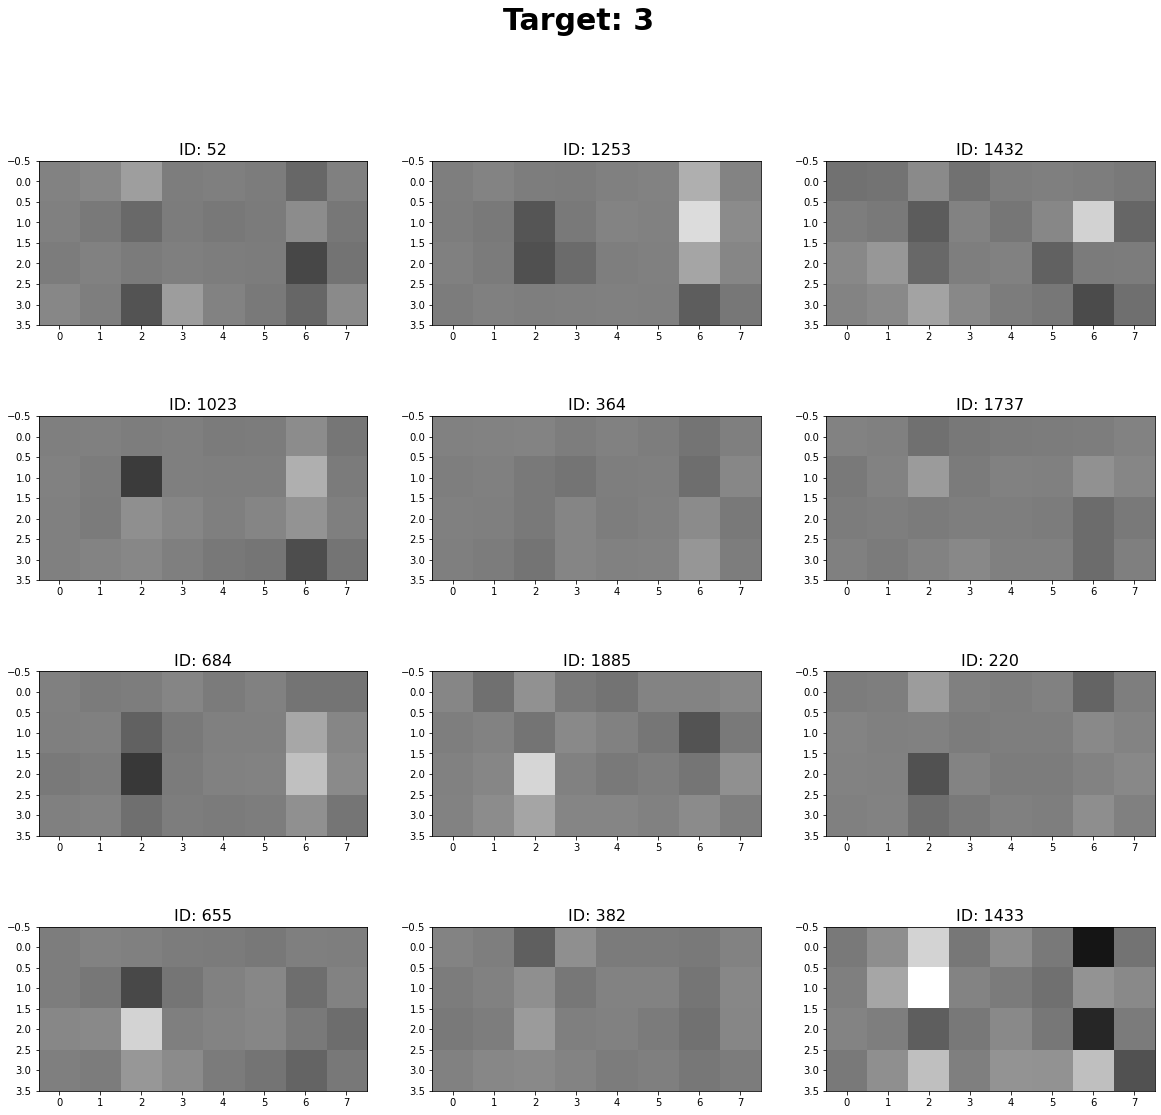

In [19]:
imshow_4_8(train, 3, 12)

## (3) Target Means

각 타겟들의 센서들을 모두 평균낸 후 시각화

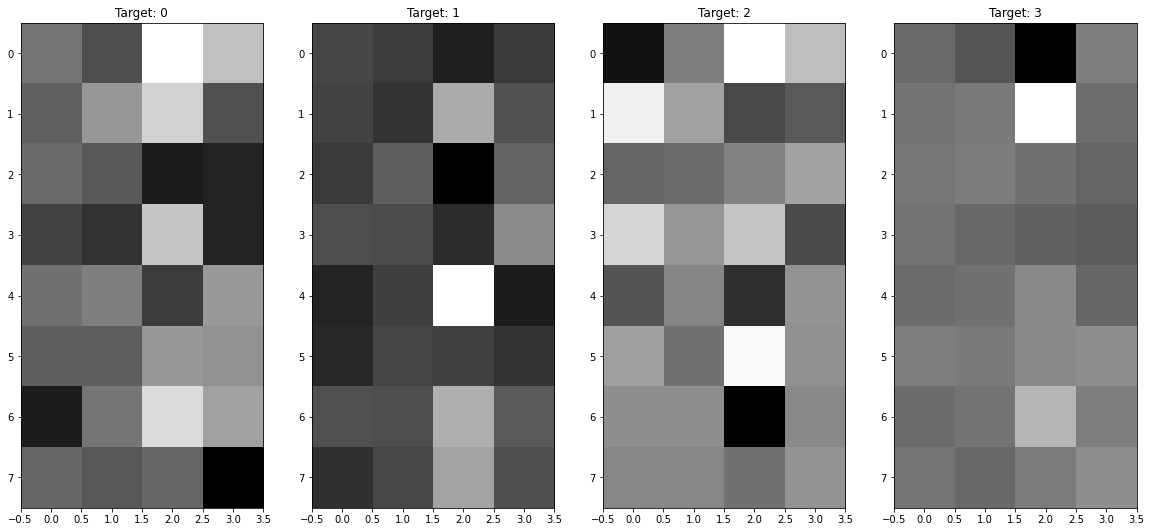

In [20]:
fig, ax = plt.subplots(1, 4, figsize = (20, 10))
for i in range(4):
    ax[i].set_title(f'Target: {i}')
    ax[i].imshow(np.array(train.drop('id', axis=1).groupby('target').mean().iloc[i]).reshape(8, 4),
                 cmap='gray')

각 타겟들의 센서들을 모두 평균내고 cmap 범위를 정해놓은 후 시각화

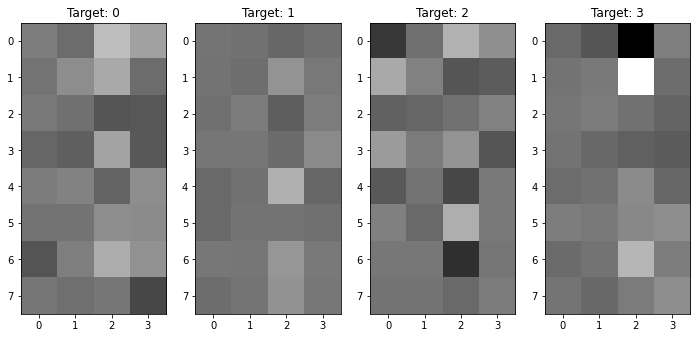

In [21]:
fig, ax = plt.subplots(1, 4, figsize = (12, 6))
for i in range(4):
    ax[i].set_title(f'Target: {i}')
    ax[i].imshow(np.array(train.drop('id', axis=1).groupby('target').mean().iloc[i]).reshape(8, 4),
                 cmap='gray', 
                 vmin=np.array(train.drop('id', axis=1).groupby('target').mean()).min(), 
                 vmax=np.array(train.drop('id', axis=1).groupby('target').mean()).max())

## (4) 3D Views

손에 부착된 센서이므로, 센서의 데이터값이 z좌표값이라고도 생각해보았습니다. <br>시각화를 어떻게 해볼지 고민하다가, 임의로 x축과 y축을 순서대로 놓은 후 시각화를 진행해보았습니다. <br> 이 논리가 맞다면, 데이터를 수집할 때 손에 센서를 부착하고 -127~127 높이의 박스 안에 집어넣었을 듯합니다.

In [22]:
def show_3d_8_4(data, target, number):
    
    df = data[data['target']==target] # target 손동작에 해당하는 데이터들만 뽑기
    ids = np.random.choice(df.id, number) # 랜덤으로 number개 추출
    
    for n in range(number):
        
        coordinates = []
        for i in range(4):
            for j in range(8):
                coordinates.append([i, j, df.loc[ids[n]-1][1:-1][i*8+j]])

        scatter3D = (Scatter3D()
                     .add("", coordinates)
                     .set_global_opts(
                         title_opts=opts.TitleOpts(f"Target: {target}, ID: {ids[0]}"),
                         visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color))
                    )

    return scatter3D.render_notebook()

In [23]:
show_3d_8_4(train, 0, 1)

In [24]:
show_3d_8_4(train, 1, 1)

In [25]:
show_3d_8_4(train, 2, 1)

In [26]:
show_3d_8_4(train, 3, 1)

In [27]:
def show_3d_4_8(data, target, number):
    
    df = data[data['target']==target] # target 손동작에 해당하는 데이터들만 뽑기
    ids = np.random.choice(df.id, number) # 랜덤으로 number개 추출
    
    for n in range(number):
        
        coordinates = []
        for i in range(8):
            for j in range(4):
                coordinates.append([i, j, df.loc[ids[n]-1][1:-1][i*4+j]])

        scatter3D = (Scatter3D()
                     .add("", coordinates)
                     .set_global_opts(
                         title_opts=opts.TitleOpts(f"Target: {target}, ID: {ids[0]}"),
                         visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color))
                    )

    return scatter3D.render_notebook()

In [28]:
show_3d_4_8(train, 0, 1)

In [29]:
show_3d_4_8(train, 1, 1)

In [30]:
show_3d_4_8(train, 2, 1)

In [31]:
show_3d_4_8(train, 3, 1)